Starting data read from csv file.
LR
NB
RF
GBC
Logistic Regression CV Score: 0.882465216187
Naive Bayes CV Score: 0.833996869197
Random Forest CV Score: 0.881110418232
Gradient Boosting CV Score: 0.886861269668


GBC Performance on Test
Accuracy Score: 0.887205573372


Confusion Matrix for GBC Test output
Confusion matrix, without normalization
[[7872  131]
 [ 889  151]]


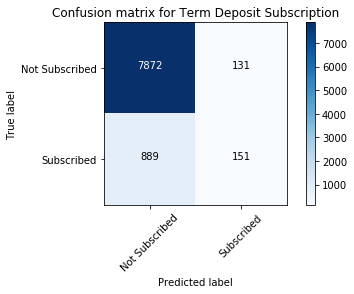

Normalized confusion matrix
[[ 0.98  0.02]
 [ 0.85  0.15]]


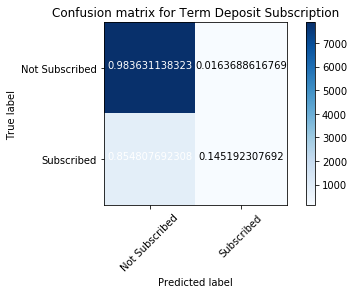



Feature Importances


,Feature,Importance
41,pdays,0.200886
27,day,0.14652
0,age,0.134757
22,balance,0.0728228
40,campaign,0.0400249
28,month__apr,0.0389214
35,month__mar,0.0359379
38,month__oct,0.0301685
30,month__dec,0.0300255
39,month__sep,0.0271502


In [38]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


def change_obj_to_category(df):
    i=0;
    while i<df.columns.size:
        if (df.dtypes[df.columns[i]] == 'object' or df.dtypes[df.columns[i]] == 'bool'):
            col = df.dtypes.index[i]
            df[col] = df[col].astype('category')
        i = i+1  
        
def change_int_to_float(df):
    i=0;
    while i<df.columns.size:
        if 'int' in str(df.dtypes[df.columns[i]]):
            col = df.dtypes.index[i]
            df[col] = df[col].astype('float64')
        i = i+1
        
def score_model(model,X,Y,scoring='accuracy'):
    return model.score(X,Y)
        
        
def roc_score_model(model,X,Y):
    from sklearn.metrics import roc_auc_score
    return roc_auc_score(Y,pd.DataFrame((model.predict_proba(X)))[1].tolist())

def feature_imp(colNames,imps):
    df = pd.DataFrame(columns=('Feature','Importance'),index=[x for x in range(0,len(colNames))])
    i = 0
    for col in colNames:
        df['Feature'][i] = col
        df['Importance'][i] = imps[i]
        i=i+1
    
    df = df.sort_values(by='Importance',ascending=False)
    return df

def predict_th(model,tx,ty,threshold=0.5):
    import pandas as pd
    probs = model.predict_proba(tx)[:,1].tolist()
    predictions = []
    for i in range(0,len(ty)):
        if probs[i]>threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    
    return predictions   


def generateXY(df,target_col,var_list):
    
    #make a copy of the required subset and drop rows containing Na
    mdata = df[var_list+[target_col]]
    mdata.dropna(inplace=True)
    
    #Separate target and put it in Y
    Y = mdata[target_col].tolist()
    del mdata[target_col]
    
    #Now, process data and create dummy variables if required with final data in Xvars
    import pandas
    Xvars = pandas.DataFrame()
    import pandas as pd
    for cols in var_list:
        if (str(mdata[cols].dtype) == 'category'):
            dummySer= pd.get_dummies(mdata[cols],prefix=cols+'_')
            Xvars = pd.concat([Xvars,dummySer],axis=1)
        else:
            Xvars =  pd.concat([Xvars,mdata[cols]],axis=1)
    
    X = Xvars
    
    return X,Y 


import pandas as pd
import numpy as np
print('Starting data read from csv file.')
#teradata = pd.read_csv('D:\\Study\\1 DSBA\\Sem II\\ABA\\project\\merged_teradata.csv',sep=',',index_col='AccountId')
bank = pd.read_csv('C:\\cabank\\bank-full.csv',sep=';')

#Modelling
#Feature List                
iv = ['age','job','marital','education','default','balance','housing','loan','day','month','campaign','pdays']
#Dependent Variable                      
dv = 'y'

bank = bank[iv+[dv]]

change_obj_to_category(bank)
change_int_to_float(bank)


#Performing 80/20 split

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(bank, train_size = 0.8,random_state=2135)
varToUse = iv
Train_X,Train_Y = generateXY(train_data,dv,varToUse)
Test_X,Test_Y = generateXY(test_data,dv,varToUse)

from sklearn import model_selection
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


cv = model_selection.KFold(5)
lr = linear_model.LogisticRegression(C=100000)
nb = GaussianNB()
rf = RandomForestClassifier()
gbc = GradientBoostingClassifier()
kFold = 5

print('LR')
cv_score_lr = np.mean(model_selection.cross_val_score(lr, Train_X, Train_Y, cv=kFold))
print('NB')
cv_score_nb = np.mean(model_selection.cross_val_score(nb, Train_X, Train_Y, cv=kFold))
print('RF')
cv_score_rf = np.mean(model_selection.cross_val_score(rf, Train_X, Train_Y, cv=kFold))
print('GBC')
cv_score_gbc = np.mean(model_selection.cross_val_score(gbc, Train_X, Train_Y, cv=kFold))

#1:
print('Logistic Regression CV Score: ' + str(cv_score_lr))
print('Naive Bayes CV Score: ' + str(cv_score_nb))
print('Random Forest CV Score: ' + str(cv_score_rf))
print('Gradient Boosting CV Score: ' + str(cv_score_gbc))

from sklearn import metrics
#2 Precision and Recall.

print '\n'
#GBC ON Test
print('GBC Performance on Test')
gbc.fit(Train_X,Train_Y)
#gbc_Pred = gbc.predict(Test_X)
print('Accuracy Score: ' + str(score_model(gbc,Test_X,Test_Y)))


print '\n'
print 'Confusion Matrix for GBC Test output'
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    np.set_printoptions(precision=2)
    plt.figure()
    import itertools    
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.figure()
    plt.show()

# Compute confusion matrix
#cnf_matrix = confusion_matrix(Test_Y, predict_th(gbc,Test_X,Test_Y,threshold=0.36))
cnf_matrix = confusion_matrix(Test_Y, gbc.predict(Test_X))
np.set_printoptions(precision=2)
plt.figure()
import itertools
plot_confusion_matrix(cnf_matrix, classes=['Not Subscribed','Subscribed'],
                      title='Confusion matrix for Term Deposit Subscription')
plt.figure()
plt.show()
# Plot normalized confusion matrix
plt.figure()

plot_confusion_matrix(cnf_matrix, classes=['Not Subscribed','Subscribed'], normalize=True,
                      title='Confusion matrix for Term Deposit Subscription')

plt.show()

print '\n'
print'Feature Importances'
feature_imp(Train_X.columns,gbc.feature_importances_)